## flag1

In [5]:
import numpy as np

In [12]:
d = "33.553693,95.367731 3.427519,8.810729 3.427518,-16.558378 3.427518,9.251522 3.427519,27.353996 3.427518,-58.786197 3.427519,-23.761676 3.427518,52.171314 3.427519,3.022563 3.427518,11.530296 3.427518,-20.781818 3.427519,-37.608121 3.427518,5.967678 3.427519,39.388092 3.427518,-69.455856 3.427519,86.600815 3.427518,-47.073287 3.427518,34.396635 3.427519,-62.500732 3.427518,50.284776 3.427517,3.145941 3.42752,-25.32662 3.42752,-30.32206 3.42752,33.949186 3.42752,-43.154654 3.42751,78.266585 3.42752,-36.914826 3.42752,20.356448 3.42752,-22.180679 3.42752,34.396635 3.42752,-43.856399 3.42751,-1.963667 3.42752,45.820066 3.42752,14.022912 3.42752,1.33461 3.42752,-6.79166 3.42752,-20.781818 3.42751,-16.771501 3.42752,16.771501 3.42752,-25.895215 3.42752,30.590373 3.42752,-3.114162 3.42752,-63.289203 3.42752,66.403365 3.42751,4.556364 3.42752,-61.754261 3.42752,28.47598 3.42752,1.84608 3.42752,-9.459764 3.42752,-30.067764 3.42751,35.812992 3.42752,53.468693 3.42752,-71.389651 3.42752,51.563822 3.42752,-69.455856 3.42752,64.854148 3.42751,24.427537 3.42752,-51.600237 3.42752,-7.613684 3.42752,39.388092 3.42752,-7.747649 3.42752,3.145941 3.42751,3.083018 3.42752,15.935339 3.42752,-44.344977 3.42752,-30.32206 3.42752,-2.250344 3.42752,76.917381 3.42752,-83.872505 3.42751,32.00673 3.42752,35.930436 3.42752,18.663649 3.42752,-48.919367 3.42752,63.118557"

In [18]:
tmp = d.split(" ")
coords = []
for s in tmp:
    y = float(s.split(",")[1])
    if len(coords):
        coords.append(coords[-1] + y)
    else:
        coords = [y]

In [19]:
# 前五个 raw 值和真实值
raw = np.array(coords[:5])
true = np.array([np.log(ord(i)) for i in "flag{"])

# 拟合线性关系
a, b = np.polyfit(raw, true, 1)  # 一次多项式拟合

# 所有 raw 坐标
all_raw = np.array(coords)

# 得到真实值
all_true = np.exp(a * all_raw + b)


In [20]:
all_true

array([101.9999998 , 108.00000038,  97.00000019, 102.99999968,
       122.99999995,  84.00000084,  72.00000092, 100.99999973,
       102.99999968, 111.00000314,  97.00000019,  76.00000103,
        79.00000077, 101.9999998 ,  65.00000114, 113.99999754,
        84.00000084, 105.00000019,  70.00000123,  97.00000019,
        98.99999995,  84.00000084,  69.00000127,  86.0000004 ,
        65.00000114, 108.00000038,  85.00000047,  97.00000019,
        84.00000084, 105.00000019,  79.00000077,  78.00000078,
       105.00000019, 114.9999976 , 116.00000223, 111.00000314,
        97.00000019,  87.00000043,  97.00000019,  82.00000073,
       100.00000005,  98.00000007,  65.00000114, 100.00000005,
       102.99999968,  69.00000127,  83.00000044,  84.00000084,
        79.00000077,  65.00000114,  82.00000073, 116.00000223,
        73.00000076, 101.9999998 ,  65.00000114,  98.99999995,
       116.00000223,  83.00000044,  79.00000077, 101.9999998 ,
        97.00000019,  98.99999995])

In [86]:
rounded = [round(n) for n in all_true]

chars = [chr(n) for n in rounded]

print(''.join(chars))

flag{THegoaLOfArTiFacTEVAlUaTiONistoaWaRdbAdgESTOARtIfActSOfacepTEDpAPerS}


## flag2

In [20]:
from xml.dom import minidom
import re
import csv

# 读取 SVG 文件
svg_file = "2.svg"
doc = minidom.parse(svg_file)

coords = []

# 遍历所有 <path> 元素
for path in doc.getElementsByTagName("path"):
    d_attr = path.getAttribute("d")
    transform_attr = path.getAttribute("transform")

    # 只处理相对小圆形的 path（这里假设圆形是以 m 0,-r 开头并闭合 Z）
    if d_attr.startswith("m") and d_attr.endswith("Z"):
        # 提取 transform matrix
        matrix_match = re.search(r"matrix\(([^)]+)\)", transform_attr)
        if matrix_match:
            nums = [float(x) for x in re.findall(r"[-+]?\d*\.\d+|[-+]?\d+", matrix_match.group(1))]
            if len(nums) == 6:
                a, b, c, d, e, f = nums
                # 圆心在 path 原点 (0,0)
                x = a*0 + c*0 + e
                y = b*0 + d*0 + f
                coords.append((x, y))

# 保存为 CSV
with open("points.csv", "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerow(["x", "y"])
    writer.writerows(coords)

print(f"总共提取 {len(coords)} 个数据点")


总共提取 112 个数据点


In [21]:
import matplotlib.pyplot as plt

def draw(coords):
    # 分离 x 和 y
    x_vals = [pt[0] for pt in coords]
    y_vals = [pt[1] for pt in coords]

    plt.figure(figsize=(8,6))
    plt.scatter(x_vals, y_vals, s=20, color='blue', alpha=0.7)  # s: 点大小, alpha: 透明度
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title("Scatter Plot from SVG Data")
    plt.axis("equal")  # 保持 x/y 比例
    plt.grid(True)

    plt.show()

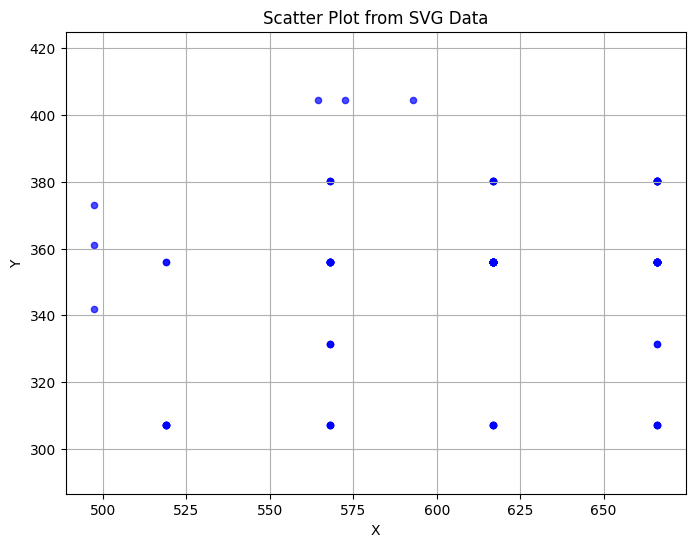

In [22]:
draw(coords)

In [27]:
newcor = [[x,-y] for x, y in coords if x > 500 and -y > -390]
len(newcor)

106

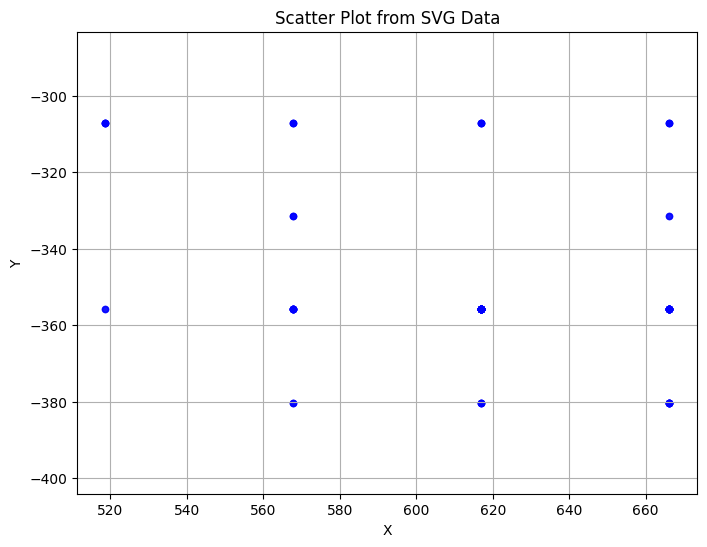

In [28]:
draw(newcor)

In [38]:
x_vals = [pt[0] for pt in newcor]
y_vals = [pt[1] for pt in newcor]

# 去重并排序
unique_x = sorted(set(x_vals))  # 从小到大
mapped_x_vals = {x: i for i, x in enumerate(unique_x)}

unique_y = sorted(set(y_vals))  # 从小到大
mapped_y_vals = {y: i for i, y in enumerate(unique_y)}

In [39]:
mapped_x_vals, mapped_y_vals

({518.74235: 0, 567.868: 1, 616.99364: 2, 666.11929: 3},
 {-380.2799: 0, -355.87555: 1, -331.4712: 2, -307.06685: 3})

In [53]:
for i,(x,y) in enumerate(newcor):
    low = mapped_x_vals[x]
    high = mapped_y_vals[y]
    if i % 2 == 1:
        v = v*16+(high*4+low)
        print(chr(v), end="")
    else:
        v = high*4+low

flag{\documentclass[sigconf,anonymous,screen,review]}